In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency


data_2024={
    "Grade": ["A", "A-", "B+", "B", "B-", "C+", "C", "C-","D+", "D", "D-", "E"],
    "Number": [1693, 7743, 19150, 43120, 75347, 99338, 111717, 118781, 128885, 153334, 151487, 48333],
    "Male": [1137, 4903, 11042, 23339, 39950, 48940, 53769, 56175, 60088, 73501, 79306, 28221],
    "Female": [556, 2840, 8108, 19781, 35397, 50397,57948, 62606, 68797, 79832, 72181, 20112]
}

In [2]:
data_2023={
    "Grade": ["A", "A-", "B+", "B", "B-", "C+", "C", "C-", "D+", "D", "D-", "E"],
    "Number": [1216, 7254, 18078, 36728, 59514, 78343, 92612, 107471, 125006, 155276, 165861, 48174],
    "Male": [825, 4472, 10370, 19822, 30521, 38888, 44201, 50616, 58974, 75664, 86429, 28214],
    "Female": [391, 2782, 7708, 16906, 28993, 39455, 48411, 56855, 66032, 79612, 79432, 19960]
}

In [26]:
df1=pd.DataFrame(data_2024)
df2=pd.DataFrame(data_2023)
df1["Year"]=2024
df2["Year"]=2023
df=pd.concat([df1,df2])
df.shape

(24, 5)

In [29]:
df.head()

,Grade,Number,Male,Female,Year
0,A,1693,1137,556,2024
1,A-,7743,4903,2840,2024
2,B+,19150,11042,8108,2024
3,B,43120,23339,19781,2024
4,B-,75347,39950,35397,2024


In [31]:
# Descriptive stats for each year
descriptive_stats_2024 = df[df['Year'] == 2024].describe()
descriptive_stats_2023 = df[df['Year'] == 2023].describe()
print("Descriptive stats for 2024:")
print(descriptive_stats_2024)
print("\nDescriptive stats for 2023:")
print(descriptive_stats_2023)

Descriptive stats for 2024:
              Number          Male        Female    Year
count      12.000000     12.000000     12.000000    12.0
mean    79910.666667  40030.916667  39842.083333  2024.0
std     54939.779407  26283.366155  28819.356981     0.0
min      1693.000000   1137.000000    556.000000  2024.0
25%     37127.500000  20264.750000  16862.750000  2024.0
50%     87342.500000  44445.000000  42897.000000  2024.0
75%    121307.000000  57153.250000  64153.750000  2024.0
max    153334.000000  79306.000000  79382.000000  2024.0

Descriptive stats for 2023:
              Number          Male        Female    Year
count      12.000000     12.000000     12.000000    12.0
mean    74627.750000  37401.333333  37211.416667  2023.0
std     55818.316022  27206.456758  28788.240896     0.0
min      1216.000000    825.000000    391.000000  2023.0
25%     32065.500000  17459.000000  14606.500000  2023.0
50%     68928.500000  34704.500000  34224.000000  2023.0
75%    111854.750000  52660.500

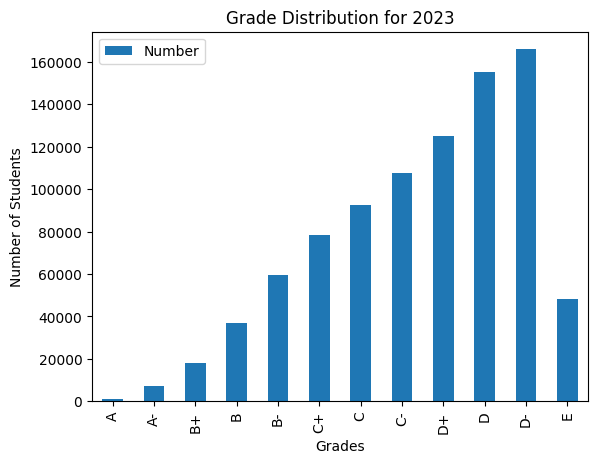

In [38]:
# Visualizing grade distribution for 2023
grades_2023 = df[df["Year"] == 2023]
grades_2023.plot(kind="bar", x="Grade",y="Number" )
plt.xlabel("Grades")
plt.ylabel("Number of Students")
plt.title("Grade Distribution for 2023")
plt.show()

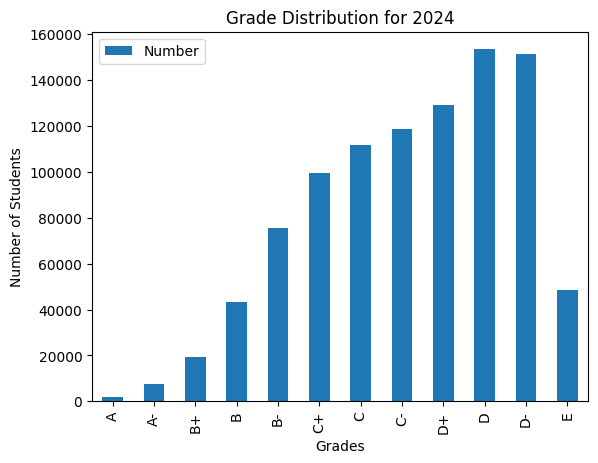

In [39]:
# Grade distribution for 2024
grades_2024 = df[df["Year"]==2024]
grades_2024.plot(kind="bar", x="Grade",y="Number" )
plt.xlabel("Grades")
plt.ylabel("Number of Students")
plt.title("Grade Distribution for 2024")
plt.show()


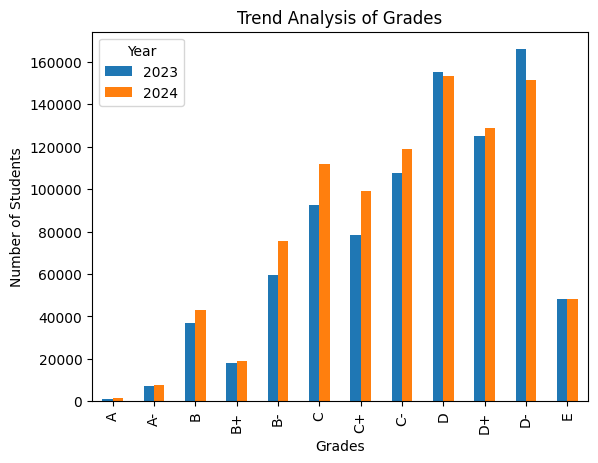

In [41]:
# Trend Analysis
grades_comparison= df.groupby(["Grade","Year"])["Number"].sum()
# Plotting trends
grades_comparison.unstack().plot(kind="bar")
plt.xlabel("Grades")
plt.ylabel("Number of Students")
plt.title("Trend Analysis of Grades")
plt.show()

In [44]:
# Statistical Testing
contigency_table=pd.crosstab(df["Grade"],df["Year"])
chi2, p, dof, expected = chi2_contingency(contigency_table)
print(f"Chi-squared test p-value: {p}")


Chi-squared test p-value: 1.0


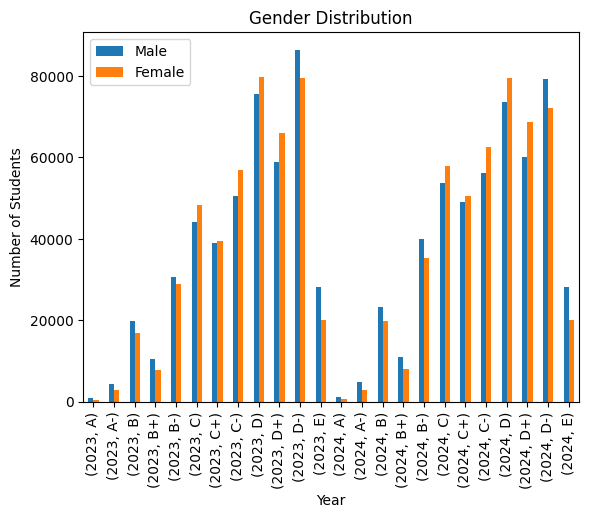

In [47]:
# Gender distribution visualization
gender_distribution = df.groupby(["Year", "Grade"]).agg({
    "Male":"sum",
    "Female":"sum"})
gender_distribution.plot(kind="bar")
plt.xlabel("Year")
plt.ylabel("Number of Students")
plt.title("Gender Distribution")
plt.show()